In [1]:
import numpy as np

# corpus = "i love deep learning and neural network. I would like to work on deep learning to understand it from depth. I believe I would need to learn statistics first."
corpus = "i love deep learning and AI. I want to work on deep learning."
tokens = corpus.lower().split()


In [2]:
def dedup_list(seq):
    seen = set()
    return [x for x in seq if not (x in seen or seen.add(x))]

vocab = dedup_list(tokens)
stoi = {w:i for i,w in enumerate(vocab)}
itos = {i:w for w,i in stoi.items()}

In [3]:
def generate_training_data(tokens, window_size=2):
    training_data = []
    for centre_idx, centre_word in enumerate(tokens):
        for context_idx in range(-window_size, window_size + 1):
            idx = centre_idx + context_idx
            if idx < 0 or idx >= len(tokens) or context_idx == 0:
                continue
            training_data.append((centre_word, tokens[idx]))
    return training_data

training_data = generate_training_data(vocab, window_size=2)
training_data

[('i', 'love'),
 ('i', 'deep'),
 ('love', 'i'),
 ('love', 'deep'),
 ('love', 'learning'),
 ('deep', 'i'),
 ('deep', 'love'),
 ('deep', 'learning'),
 ('deep', 'and'),
 ('learning', 'love'),
 ('learning', 'deep'),
 ('learning', 'and'),
 ('learning', 'ai.'),
 ('and', 'deep'),
 ('and', 'learning'),
 ('and', 'ai.'),
 ('and', 'want'),
 ('ai.', 'learning'),
 ('ai.', 'and'),
 ('ai.', 'want'),
 ('ai.', 'to'),
 ('want', 'and'),
 ('want', 'ai.'),
 ('want', 'to'),
 ('want', 'work'),
 ('to', 'ai.'),
 ('to', 'want'),
 ('to', 'work'),
 ('to', 'on'),
 ('work', 'want'),
 ('work', 'to'),
 ('work', 'on'),
 ('work', 'learning.'),
 ('on', 'to'),
 ('on', 'work'),
 ('on', 'learning.'),
 ('learning.', 'work'),
 ('learning.', 'on')]

In [5]:
vocab_size = len(vocab)
def one_hot_encoding(word):
    vec = np.zeros(vocab_size)
    vec[stoi[word]] = 1
    return vec

In [6]:
embedding_dim = 5
W1 = np.random.randn(vocab_size, embedding_dim)
W2 = np.random.randn(embedding_dim, vocab_size)


In [7]:
def softmax(x):
    ex = np.exp(x - np.max(x))
    return ex / ex.sum(axis=0)

In [12]:
def train(training_data, epochs=10000, learning_rate=0.01):
    global W1, W2
    for epoch in range(epochs):
        loss = 0.0
        for center_word, context_word in training_data:
            x = one_hot_encoding(center_word).reshape(-1, 1)
            y_true = one_hot_encoding(context_word).reshape(-1, 1)
            #forward pass
            h = W1.T @ x
            logits = W2.T @ h
            y_pred = softmax(logits)

            loss -= np.sum(y_true * np.log(y_pred))
            #backward pass
            e = y_pred - y_true
            dW2 = np.dot(h, e.T)
            dW1 = np.dot(x, np.dot(W2, e).T)

            # Update weights
            W1 -= learning_rate * dW1
            W2 -= learning_rate * dW2
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss:.4f}")

train(training_data, epochs=10000, learning_rate=0.01)

Epoch 0, Loss: 50.5790
Epoch 100, Loss: 50.5672
Epoch 200, Loss: 50.5558
Epoch 300, Loss: 50.5447
Epoch 400, Loss: 50.5340
Epoch 500, Loss: 50.5237
Epoch 600, Loss: 50.5137
Epoch 700, Loss: 50.5040
Epoch 800, Loss: 50.4947
Epoch 900, Loss: 50.4858
Epoch 1000, Loss: 50.4772
Epoch 1100, Loss: 50.4689
Epoch 1200, Loss: 50.4610
Epoch 1300, Loss: 50.4533
Epoch 1400, Loss: 50.4460
Epoch 1500, Loss: 50.4390
Epoch 1600, Loss: 50.4322
Epoch 1700, Loss: 50.4258
Epoch 1800, Loss: 50.4196
Epoch 1900, Loss: 50.4136
Epoch 2000, Loss: 50.4080
Epoch 2100, Loss: 50.4025
Epoch 2200, Loss: 50.3973
Epoch 2300, Loss: 50.3922
Epoch 2400, Loss: 50.3874
Epoch 2500, Loss: 50.3828
Epoch 2600, Loss: 50.3783
Epoch 2700, Loss: 50.3741
Epoch 2800, Loss: 50.3700
Epoch 2900, Loss: 50.3660
Epoch 3000, Loss: 50.3622
Epoch 3100, Loss: 50.3586
Epoch 3200, Loss: 50.3551
Epoch 3300, Loss: 50.3517
Epoch 3400, Loss: 50.3485
Epoch 3500, Loss: 50.3453
Epoch 3600, Loss: 50.3423
Epoch 3700, Loss: 50.3394
Epoch 3800, Loss: 50.336

In [15]:
def get_embedding(word):
    return W1[stoi[word]]

word = 'deep'
print(f"Embedding for '{word}':", get_embedding(word))

Embedding for 'deep': [-1.32760221  1.17014495 -0.42276552 -0.00984344 -1.51755505]


In [16]:
embeddings = W1
labels = [itos[i] for i in range(vocab_size)]


/Users/subhojit/workspace/saturn/.venv/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


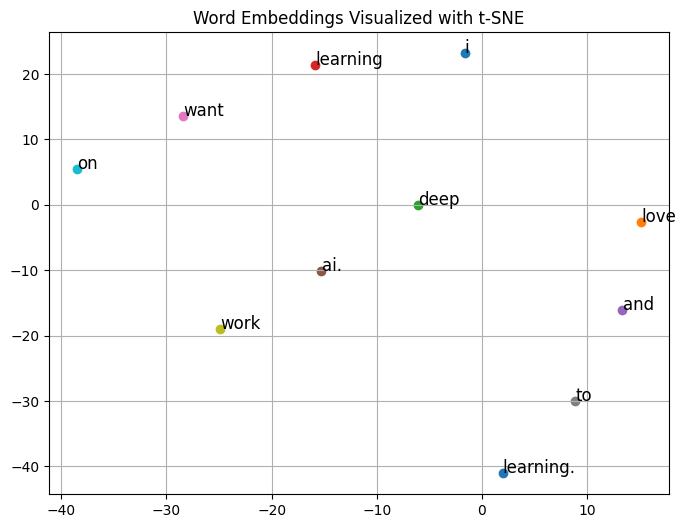

In [17]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

#Visualization t-SNE
def visualize_embeddings(embeddings, labels):
    tsne = TSNE(n_components=2, random_state=42, perplexity=5, n_iter=1000)
    reduced = tsne.fit_transform(embeddings)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        x, y = reduced[i, :]
        plt.scatter(x, y)
        plt.annotate(label, (x + 0.01, y + 0.01), fontsize=12)
    plt.title("Word Embeddings Visualized with t-SNE")
    plt.grid(True)
    plt.show()

visualize_embeddings(embeddings, labels)
